Before you turn this homework set in, make sure everything runs as expected. When you are done modifying this file,  **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below. In the code cells, make sure to replace the **raise NotImplementedError()** statement with your actual code.

In [ ]:
NAME = "Liyuan Sun"

---

# Homework 9

Run the code given below to create 400 simulated 2-dimensional observations ```X``` and corresponding true labels ```y_true```. True labels range from 0 to 3. 

Also, we're creating a scatterplot of the data and indicating group membership by use of the four colors magenta (group 0), green (group 1), yellow (group 2), blue (group 3), respectively. 

In [1]:
from sklearn.datasets.samples_generator import make_blobs 
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=400, centers=4,
                                  cluster_std=1, center_box=(-10.0, 10.0), random_state=0) 

fig, axe = plt.subplots()
colors = ('m', 'g', 'y', 'b')
axe.scatter(X[:, 0], X[:, 1], c = [colors[y_true[i]] for i in range(len(y_true))], s=30); 

(400, 2)
[3 2 2 0 2 3 1 0 2 1 3 1 0 2 2 1 2 1 0 2 2 2 3 0 0 3 3 0 0 1 0 0 2 0 2 3 1
 0 1 0 2 3 1 0 1 3 1 1 1 3 3 3 2 3 3 2 0 1 1 2 1 1 1 1 0 2 1 0 2 3 2 0 2 3
 1 2 0 2 3 2 2 0 1 3 0 2 2 0 2 1 2 1 0 2 2 3 0 1 1 1 3 1 0 0 2 3 0 3 1 2 2
 2 0 2 3 1 3 2 3 3 1 2 1 3 0 3 1 1 1 0 3 3 3 2 0 2 3 0 3 2 0 2 2 3 2 1 0 2
 1 2 1 0 1 0 3 2 1 2 2 2 0 2 3 2 2 3 1 1 2 3 3 3 3 1 1 1 0 2 0 3 0 3 2 0 3
 2 3 0 0 3 0 0 3 2 3 3 3 1 1 0 0 2 1 1 3 0 2 3 0 3 0 0 1 1 3 1 0 3 1 3 2 0
 3 2 2 2 1 3 0 3 0 2 0 0 3 1 2 1 0 2 1 0 0 3 1 0 3 0 1 2 2 1 2 0 3 3 0 0 1
 3 0 2 2 2 3 0 0 0 0 0 1 0 0 3 2 1 3 1 1 1 3 1 1 3 3 3 1 0 1 0 1 2 0 1 2 0
 1 1 0 2 3 3 0 3 1 1 0 3 3 1 1 0 3 0 1 0 1 3 2 2 1 2 0 2 2 3 2 3 1 2 3 1 3
 0 2 0 2 1 0 1 3 1 1 1 1 3 1 2 1 2 1 0 3 2 1 1 0 2 2 3 3 3 2 0 1 0 2 1 2 3
 2 0 0 2 3 0 3 3 2 3 2 3 0 0 0 2 3 3 3 3 2 3 0 1 1 0 0 1 2 1]


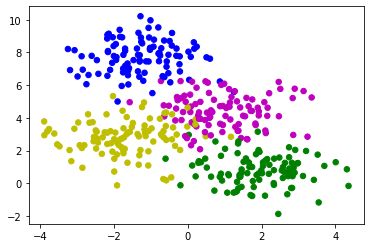

In [23]:
from sklearn.datasets.samples_generator import make_blobs 
import matplotlib.pyplot as plt

# scatterplot the original data

X, y_true = make_blobs(n_samples=400, centers=4,                                             # 4 clusters (centers)
                                  cluster_std=1, center_box=(-10.0, 10.0), random_state=0)   # 2 features
print(X.shape)   # array of shape [n_samples, n_features]
print(y_true)    # array of shape [n_samples]

fig, axe = plt.subplots()
colors = ('m', 'g', 'y', 'b')
axe.scatter(X[:, 0], X[:, 1], c = [colors[y_true[i]] for i in range(len(y_true))], s=30); 

## Problem 1

(a) Consider the data (X,y_true) that were simulated above to be your training data. Use the Gaussian Naive Bayes algorithm to predict the label color of the point x with coordinates (0,4) "by-hand". Show your work. You can compute multivariate normal densities using the ```scipy.stats``` module or by using your calculator. Please state which method you used in your answer.  

Optional code box:

In [20]:
import numpy as np
from scipy import stats

# predict the label color of point 'by-hand'
Xi = []
Pi = []

for i in range(4):
    Xi.append(X[y_true == i, ])     # find the training data for each groups (0,1,2,3)
    mui = np.mean(Xi[i], axis = 0)  # find means and stds for each of the four groups 
    Si = np.cov(Xi[i].T)            
    rvi = stats.multivariate_normal(mui, Si) 
    Pi.append(rvi.pdf((0,4)))       

print(Pi)  # find the desnity P(features/Li) at (0,4)
    
# In order to decide the label for our point (0, 4), P(Li) = 0.25 for all four groups
# we only need to compare the likelihood for each group: P(features/Li)

[0.09254468932740106, 0.00010345577317743739, 0.024020777956571045, 8.370808382584467e-05]


Explain your code or show your work and state your answer here. If you are not using Python, but some other approach, make sure you explain how you come up with your answer. 

**Answer:** Considering when i=0, the likelihood = (features|Li) = -.0925 is the largest one compared with the other three conditional densities for the chosen point (0,4). So I predict the label color of the point (0,4) is **magenta**.

(b) Use SciKit-Learn to apply the Gaussian Naive Bayes classification algorithm to all points ```X``` that you simulated and create a predicted label for each point. Produce another scatterplot showing the 400 points in ```X``` but this time color points by their labels predicted through the Gaussian Naive Bayes method. 

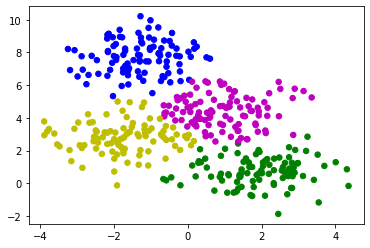

In [22]:
from sklearn.naive_bayes import GaussianNB 

# use the Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X, y_true) 

# create a predicted label for each point
y_predict = model.predict(X)

fig, ax = plt.subplots()
colors = ('m', 'g', 'y', 'b')
ax.scatter(X[:, 0], X[:, 1], c = [colors[y_predict[i]] for i in range(len(y_predict))], s=30); 

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from (b)) to the true labels ```y_true```. Display your confusion matrix as a heat map like we did in class. Which percentage of points are predicted correctly by the Gaussian Naive Bayes algorithm?

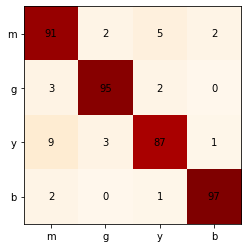

In [26]:
from sklearn.metrics import confusion_matrix

# display the confusion matrix by heat map
mat = confusion_matrix(y_true, y_predict) 

fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd') # making the heat-map image 
ax.set_xticks(np.arange(4)) # define tick-mark positions
ax.set_yticks(np.arange(4))
ax.set_xticklabels(colors)  # label ticks with color groups
ax.set_yticklabels(colors)  # y_axis = predict
ax.set_ylim(len(mat)-0.5, -0.5) # there is a bug in matplotlib that offsets y-limits in heatmaps

for i in range(4): # Loop over data dimensions and create text annotations:
    for j in range(4):
        text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k");

**Answer:** According to the confusion matrix, we can see that the numbers in all four diagonal cells are very large compared to other entries in those rows, therefore I think the Guassian Naive Bayes model predicts very well. **92.5%** of the points are predicted correctly by the Gaussian Naive Bayes algorithm

## Problem 2

(a) Use SciKit-Learn to apply the k-means clustering algorithm (with k=4) to only the ```X``` matrix of the simulated data. For the resulting four clusters, use a majority vote over the true ```y_true``` labels to assign each cluster a label. 

**Hint:** we did something extremely similar in the clustering/classification of handwritten digits example we did in class. 

In [27]:
from sklearn.cluster import KMeans
from scipy.stats import mode

# before re-order the predicted labels
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)          

# re-order the predicted labels
y_predict_2 = np.zeros_like(y_kmeans) # make empty NP array of y_kmeans

for i in range(4):
    mask = (y_kmeans == i)            
    y_predict_2[mask] = mode(y_true[mask])[0]

print(y_kmeans[:10])    # before re-order
print(y_predict_2[:10]) # after re-order

[3 2 2 3 2 1 0 3 2 0]
[0 2 2 0 2 3 1 0 2 1]


(b) Produce another scatterplot showing the 400 points in ```X``` and use the labels produced in Problem 2 (a) to color the points. 

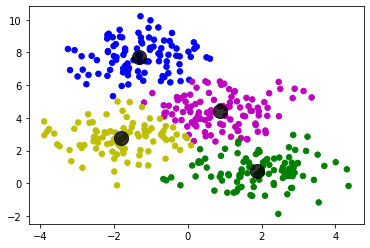

In [30]:
colors = ('m', 'g', 'y', 'b')
plt.scatter(X[:, 0], X[:, 1], c=[colors[y_predict_2[i]] for i in range(len(y_predict_2))], s=30) 

# plot centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],  c='black', s=200, alpha=0.8);

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from 2 (b)) to the true labels ```y_true```.  Display your confusion matrix as a heat map like we did in class. Which percentage of points are predicted correctly by the k-means algorithm (with following majority vote over true labels)?

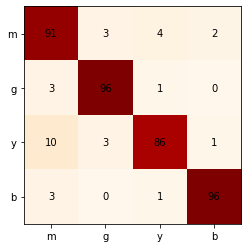

In [31]:
from sklearn.metrics import confusion_matrix

# creates confusion matrix
mat = confusion_matrix(y_true, y_predict_2) 

fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd') # making the heat-map image 
ax.set_xticks(np.arange(4)) # define tick-mark positions
ax.set_yticks(np.arange(4))
ax.set_xticklabels(colors) # label ticks with color groups
ax.set_yticklabels(colors)  # y_axis = predict
ax.set_ylim(len(mat)-0.5, -0.5) # there is a bug in matplotlib that offsets y-limits in heatmaps

for i in range(4): # Loop over data dimensions and create text annotations:
    for j in range(4):
        text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k");

**Answer:** According to the confusion matrix, **92.25%** of the points are predicted correctly by the k-means algorithm.

## Problem 3

(a) Use SciKit-Learn to fit a decision tree to the simulated data ```(X,y_true)```. Set the ```max_depth``` of the tree to 3 (to make three nodes in your tree and end up with four different "leaves" on your tree).

In [33]:
from sklearn.tree import DecisionTreeClassifier 

np.random.seed(10) 

# growing the tree by at most three levels
tree = DecisionTreeClassifier(max_depth=3) 
tree.fit(X, y_true) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

(b) Produce another scatterplot showing the 400 points in ```X``` and use the labels produced by the Decision Tree procedure in Problem 4 (a) to color the points. 

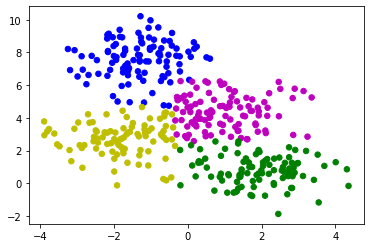

In [34]:
y_predict_3 = tree.predict(X)
colors = ('m', 'g', 'y', 'b')
plt.scatter(X[:, 0], X[:, 1], c=[colors[y_predict_3[i]] for i in range(len(y_predict_3))], s=30);

(c) Use SciKit-Learn to create a confusion matrix that compares your predicted labels (from 4 (a)) to the true labels ```y_true``` from Problem 1. Which percentage of points are predicted correctly by the decision tree? Display your confusion matrix as a heat map like we did in class. 

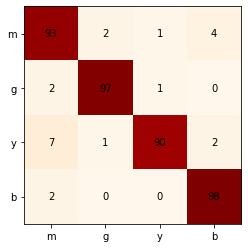

In [35]:
from sklearn.metrics import confusion_matrix

# creates confusion matrix
mat = confusion_matrix(y_true, y_predict_3) 

fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd')
ax.set_xticks(np.arange(4)) # define tick-mark positions
ax.set_yticks(np.arange(4))
ax.set_xticklabels(colors)  # label ticks with color groups
ax.set_yticklabels(colors)  
ax.set_ylim(len(mat)-0.5, -0.5) # there is a bug in matplotlib that offsets y-limits in heatmaps

for i in range(4): # Loop over data dimensions and create text annotations:
    for j in range(4):
        text = ax.text(j, i, mat[i, j], ha="center", va="center", color="k");

**Answer:** According to the confusion matrix, **94.5%** of the points are predicted correctly by the decision tree algorithm.

## Problem 4

Describe what differences you observe between the three different methods you applied. What differences can you see in the three scatter plots in terms of shapes of predicted point clouds? Which method seems to "best" represent the four original groups? In which sense is the separation into original groups the best? Explain. 

**Answer:**
<br> **Naive Bayes** This is a classification algorithm.
<br> **K-Means Clustering** This is a clustering algorithm.
<br> **Decision Trees** This is a classification algorithm.
<br> From these three scatter plots, there're a little difference in different groups points intercept. But the difference is very small. I think all of them do very well in prediction. By compareing the percentage of prediction correctly, using the heat map, Naive Bayes (92.5%) K-Means Clustering (92.25%) Decision Trees (94.5%). Decision Trees algorithm made the best score. 